In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Задание 1

In [2]:
con = sqlite3.connect('works.sqlite')
cursor = con.cursor()
cursor.execute('drop table if exists works')
cursor.execute('create table if not exists works (ID INTEGER PRIMARY KEY AUTOINCREMENT, salary INTEGER, educationType TEXT,'
              'jobTitle TEXT, qualification TEXT, gender TEXT, dateModify TEXT,skills TEXT,otherInfo TEXT)')

In [3]:
cursor.execute('pragma table_info(works)').fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'educationType', 'TEXT', 0, None, 0),
 (3, 'jobTitle', 'TEXT', 0, None, 0),
 (4, 'qualification', 'TEXT', 0, None, 0),
 (5, 'gender', 'TEXT', 0, None, 0),
 (6, 'dateModify', 'TEXT', 0, None, 0),
 (7, 'skills', 'TEXT', 0, None, 0),
 (8, 'otherInfo', 'TEXT', 0, None, 0)]

In [4]:
df = pd.read_csv("works.csv")
df.to_sql("works", con, if_exists='append', index=False)
cursor.execute('select * from works limit 5').fetchall()

[(1,
  60000,
  'Высшее',
  'Специалист пресс-службы',
  'Магистр',
  'Мужской',
  '2021-04-01',
  '<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',
  None),
 (2,
  85000,
  'Высшее',
  'менеджер проектов',
  None,
  'Мужской',
  '2021-04-01',
  None,
  None),
 (3,
  15000,
  'Среднее профессиональное',
  '....',
  None,
  'Женский',
  '2021-06-01',
  None,
  None),
 (4, 30000, None, None, None, 'Женский', '2021-04-03', None, None),
 (5, 45000, None, None, None, 'Мужской', '2021-06-28', None, None)]

## Задание 2

In [5]:
cursor.execute('create index salary_index on works(salary)')
# Да, размер файла увеличился на 0,34 мб

## Задание 3

In [6]:
cursor.execute('select count(*) from works').fetchall()[0][0]

32683

## Задание 4

In [19]:
genders = ("Мужской", "Женский")

for gender in genders:
    count = cursor.execute(f"SELECT COUNT(*) FROM works WHERE {gender=}").fetchone()
    print(f"Количество людей с гендором '{gender}': {count[0]}")

Количество людей с гендором 'Мужской': 13386
Количество людей с гендором 'Женский': 17910


## Задание 5

In [20]:
cursor.execute('select count(*) from works where skills not null').fetchall()[0][0]

8972

## Задание 6


In [21]:
cursor.execute('select skills from works where skills not null limit 3').fetchall()

[('<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',),
 ('Ответственная,пунктуальная,дисциплинированная я,стрессоустойчивая,легкообучаема ,технически оснащена',),
 ('<p>Коммуникабельность&nbsp;</p>',)]

## Задание 7 

In [22]:
cursor.execute('select salary from works where skills like "%Python%"').fetchall()

[(35000,),
 (20000,),
 (35000,),
 (15000,),
 (25000,),
 (90000,),
 (30000,),
 (50000,),
 (23000,),
 (23000,)]

## Задание 8

In [23]:
men = cursor.execute('SELECT salary FROM works where gender = "Мужской"').fetchall()
salaryMen = []
for i in men:
    salaryMen.append(i[0])
np.quantile(salaryMen, np.linspace(.1, 1, 10))

array([  15000.,   20000.,   25000.,   30000.,   30000.,   35000.,
         40000.,   50000.,   60000., 1000000.])

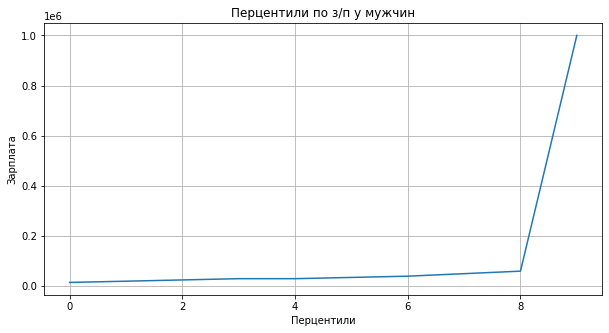

In [24]:
plt.figure(figsize=(10, 5))
plt.title('Перцентили по з/п у мужчин')
plt.xlabel('Перцентили')
plt.ylabel('Зарплата')
plt.grid()
plt.plot(np.quantile(salaryMen, np.linspace(.1, 1, 10)))
plt.show()

In [25]:
wom = cursor.execute('SELECT salary FROM works where gender = "Женский"').fetchall()
salaryWom = []
for i in wom:
    salaryWom.append(i[0])
np.quantile(salaryWom, np.linspace(.1, 1, 10))

array([ 15000.,  18000.,  20000.,  22000.,  25000.,  30000.,  30000.,
        35000.,  47000., 900000.])

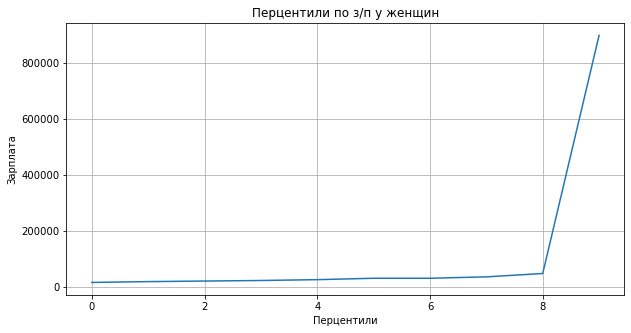

In [26]:
plt.figure(figsize=(10, 5))
plt.title('Перцентили по з/п у женщин')
plt.xlabel('Перцентили')
plt.ylabel('Зарплата')
plt.grid()
plt.plot(np.quantile(salaryWom, np.linspace(.1, 1, 10)))
plt.show()

## Задание 9

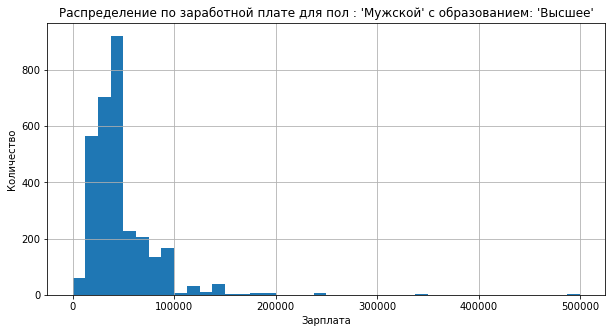

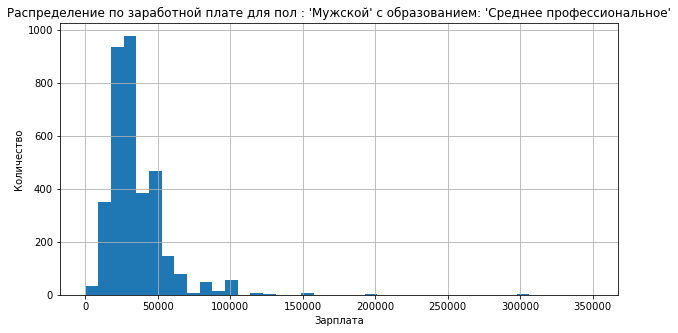

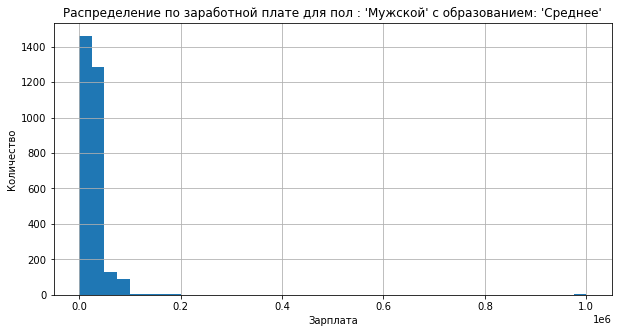

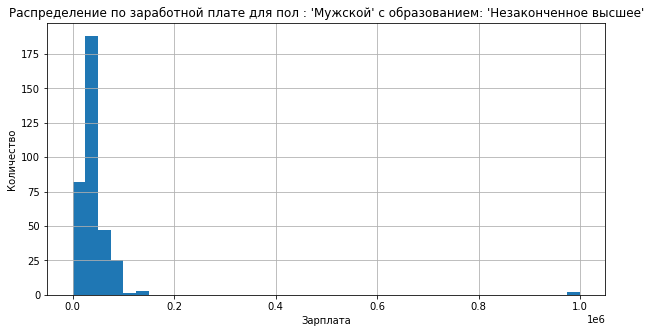

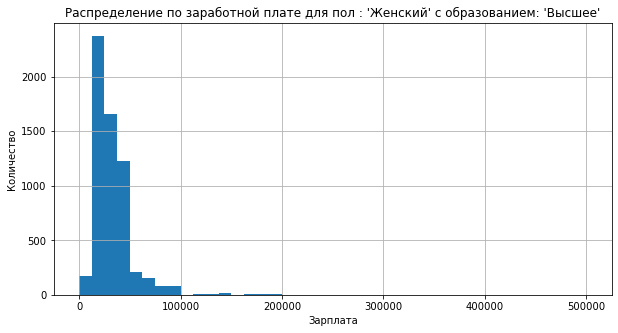

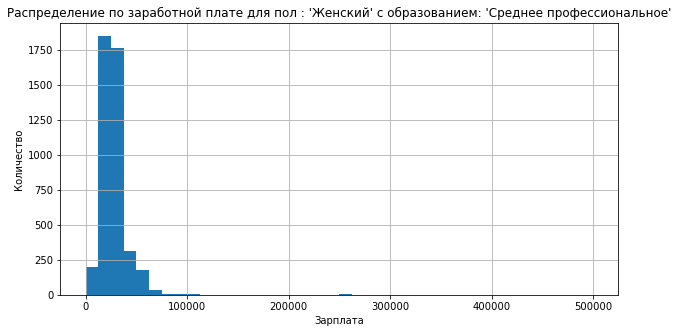

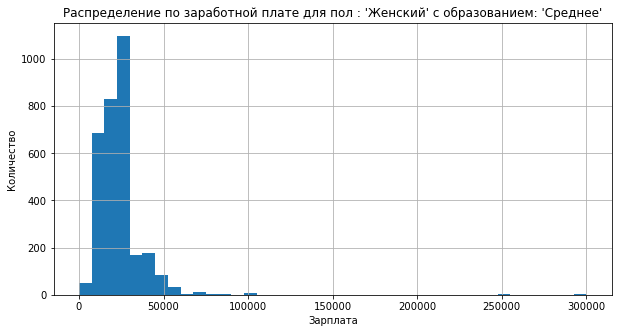

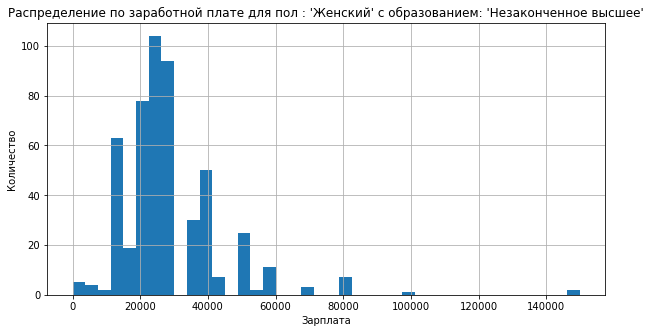

In [27]:
import matplotlib.pyplot as plt

educations = cursor.execute("SELECT DISTINCT educationType FROM works WHERE educationType IS NOT NULL").fetchall()
educations = [ed[0] for ed in educations]

for gender in genders:
    for educationType in educations:
        plt.figure(figsize=(10, 5))  
        plt.grid()
        plt.title(f"Распределение по заработной плате для пол : '{gender}' с образованием: '{educationType}'") 
        plt.xlabel("Зарплата") 
        plt.ylabel("Количество") 
        query = f'SELECT salary FROM works WHERE {gender=} and {educationType=}'
        salaries = [i[0] for i in cursor.execute(query).fetchall()]
        plt.hist(salaries, bins=40)

# ДЗ

### Создайте отдельную таблицу с гендером, заполните ее значениями, сделайте на нее внешний ключ из таблицы works.

In [28]:
cursor.execute("create table if not exists genders (ID INTEGER PRIMARY KEY AUTOINCREMENT, gender TEXT)")
cursor.execute('pragma table_info(genders)').fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1), (1, 'gender', 'TEXT', 0, None, 0)]

In [29]:
cursor.execute('insert into genders(gender) select distinct gender from works where gender is not null')
cursor.execute('alter table works add column id_gend INTEGER REFERENCES genders(ID)')

In [30]:
cursor.execute('UPDATE works SET id_gend = (SELECT ID FROM genders WHERE gender = works.gender)')

In [31]:
cursor.execute('ALTER TABLE works DROP COLUMN gender')

In [32]:
cursor.execute("pragma table_info(works)").fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'educationType', 'TEXT', 0, None, 0),
 (3, 'jobTitle', 'TEXT', 0, None, 0),
 (4, 'qualification', 'TEXT', 0, None, 0),
 (5, 'dateModify', 'TEXT', 0, None, 0),
 (6, 'skills', 'TEXT', 0, None, 0),
 (7, 'otherInfo', 'TEXT', 0, None, 0),
 (8, 'id_gend', 'INTEGER', 0, None, 0)]

In [33]:
cursor.execute("SELECT * FROM genders").fetchall()

[(1, 'Мужской'), (2, 'Женский')]

In [34]:
cursor.execute('SELECT id_gend FROM works limit 5').fetchall()

[(1,), (1,), (2,), (2,), (1,)]

### Отдельная таблица для образования

In [35]:
cursor.execute("create table if not exists education (ID INTEGER PRIMARY KEY AUTOINCREMENT, educationType TEXT)")
cursor.execute('insert into education(educationType) select distinct educationType from works where educationType is not null')
cursor.execute('alter table works add column id_educ INTEGER REFERENCES education(ID)')
cursor.execute('UPDATE works SET id_educ = (SELECT ID FROM education WHERE educationType = works.educationType)')
cursor.execute('ALTER TABLE works DROP COLUMN educationType')

In [36]:
cursor.execute("pragma table_info(works)").fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'jobTitle', 'TEXT', 0, None, 0),
 (3, 'qualification', 'TEXT', 0, None, 0),
 (4, 'dateModify', 'TEXT', 0, None, 0),
 (5, 'skills', 'TEXT', 0, None, 0),
 (6, 'otherInfo', 'TEXT', 0, None, 0),
 (7, 'id_gend', 'INTEGER', 0, None, 0),
 (8, 'id_educ', 'INTEGER', 0, None, 0)]

In [37]:
cursor.execute("SELECT * FROM education").fetchall()

[(1, 'Высшее'),
 (2, 'Среднее профессиональное'),
 (3, 'Среднее'),
 (4, 'Незаконченное высшее')]

In [38]:
cursor.execute('SELECT id_educ FROM works limit 5').fetchall()

[(1,), (1,), (2,), (None,), (None,)]

# Скилы и otherInfo

Очистить поля от html

In [46]:
import re

works_new = cursor.execute("SELECT ID, skills, otherInfo FROM works").fetchall()
clear = []
for id, skills, other_info in works_new:
    if skills is not None:
        #замена лишних символов на пробел(иначе могут сливаться слова)
        skills = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', ' ', skills) 
        #замена подряд идущих пробелов на один
        skills = re.sub(r'[  ]+', ' ', skills) 
        # удаление пробела начале и в конце
        skills = skills.strip()
    if other_info is not None:   
        other_info = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', ' ', other_info)
        other_info = re.sub(r'[  ]+', ' ', other_info)
        other_info = other_info.strip()
    clear.append((skills, other_info, id))
cursor.executemany("UPDATE works SET skills = ?, otherInfo = ? WHERE ID = ?", clear)

In [47]:
cursor.execute("SELECT * FROM works limit 3").fetchall()

[(1,
  60000,
  'Специалист пресс-службы',
  'Магистр',
  '2021-04-01',
  'Аналитическое мышление, ответственность, стабильность психологического состояния и настроения.',
  None,
  1,
  1),
 (2, 85000, 'менеджер проектов', None, '2021-04-01', None, None, 1, 1),
 (3, 15000, '....', None, '2021-06-01', None, None, 2, 2)]